---
title: "Global Insights on HIV Treatment & ARI care"
format:
  html:
    toc: true       # Enable Table of Contents
    toc-location: left   # Move ToC to the left side
    code-fold: true
    code-summary: "Show Code"
    code-tools: false
    embed-resources: true
---


Student Name: Saloni Deepak Mishra

Student ID: A00046436

Programme: MSc in Management (Strategy)

Thanks to Professor Dr. Damien Dupre, Dublin City University, for his unwavering guidance and support.

## Summary in short

This report explores global disparities in child vulnerability using data from UNICEF and the World Bank.

It combines key indicators —immunization rates, GDP,  life expectancy and orphan counts .

Visual analytics highlights more about population risks countries carry and rise of consumer prices in certain countries.

## Introduction 




This project examines global disparities in HIV treatment and Acute Respiratory Infection (ARI) care from 2000 to 2025. By tracking gender gaps, access to healthcare facilities, and treatment trends over time, the goal is to shed light on the uneven healthcare coverage across countries. We dive into a time series analysis that reveals steady progress in HIV treatment, contrasted with inconsistent advancements in ARI care.

Notably, the project uncovers gender-based disparities, with data often showing greater access and better outcomes for females in both HIV treatment and ARI care. The analysis also explores the relationship between hospital access and healthcare outcomes, highlighting stark country-level differences and emphasizing the need for global healthcare equity.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default = "iframe_connected"
import plotly.express as px

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Read the file

In [3]:
df = pd.read_csv(r'C:\Users\ak973\OneDrive\Desktop\unified_unicef_data.csv')


In [4]:
# df.info()

In [5]:
# df.isnull().sum()

By the above nulls check we get to see multiple nan values but we arent going to drop since data dimension is too less.

In [6]:
# df.describe().T

## Exploratory Data Analysis ##

In [7]:
# df.head(5)

In [8]:
# df['sex_ari'].unique()

## Data filtering to check any nuances

In [9]:
# filtered_df = df[df['country'] == 'Afghanistan']


## Divide the data into categorical and numerical cols

In [10]:
# cat_cols = [col for col in df.columns if df[col].dtype == "object"]
# num_cols = [col for col in df.columns if col not in cat_cols]

In [11]:
# cat_cols

In [12]:
# num_cols

## Visualizations ##

1. Pairplot
2. Histogram for distribution
3. world map using plotly
4. regplot to check regression
5. barplot
6. time series line plot

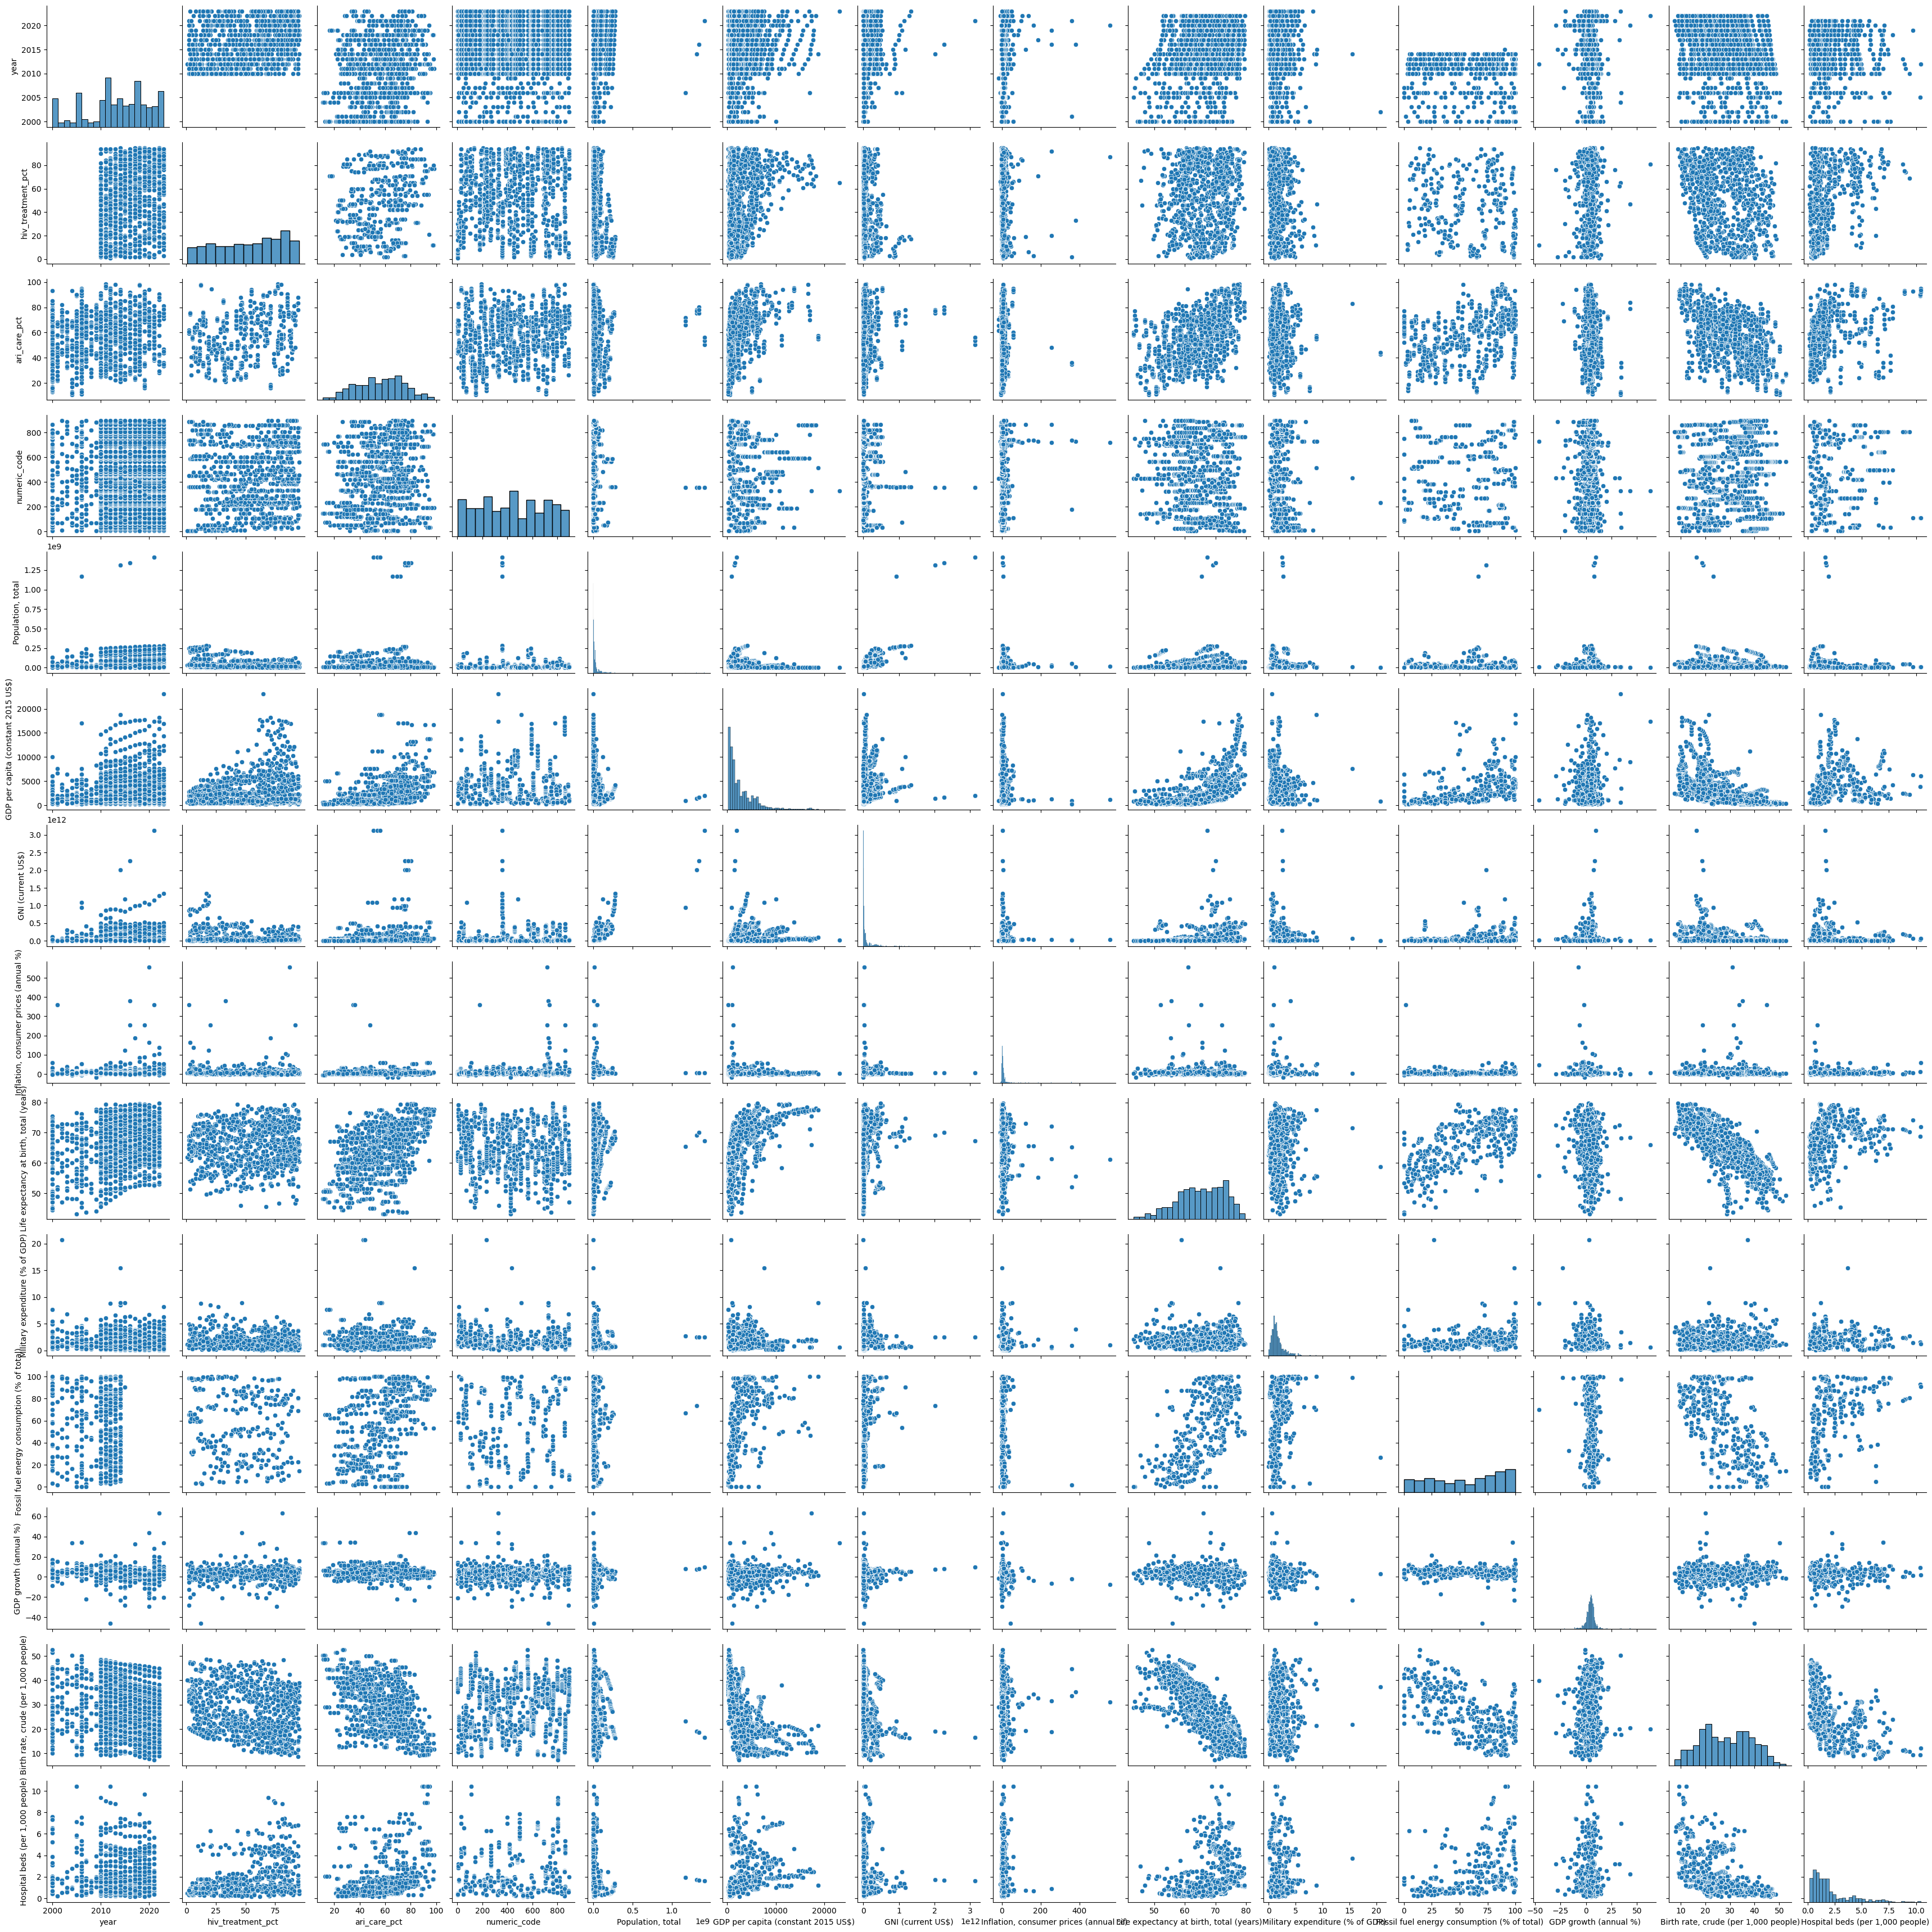

In [13]:
sns.pairplot(df)

This data paints a picture of global health, focusing on HIV treatment and ARI care. The coverage map reveals uneven access to HIV treatment worldwide. Comparing ARI care and HIV treatment shows how progress in one often aligns with the other. Looking at gender gaps in ARI care over time highlights shifting equity, often favoring females. The time series shows steady HIV treatment improvement, while ARI care trends are more varied. Finally, hospital access and ARI care in top countries underscore significant national differences. Ultimately, the data suggests that strengthening one area of care can positively impact the other, emphasizing the need for integrated healthcare efforts globally.

<Axes: xlabel='Inflation, consumer prices (annual %)', ylabel='Count'>

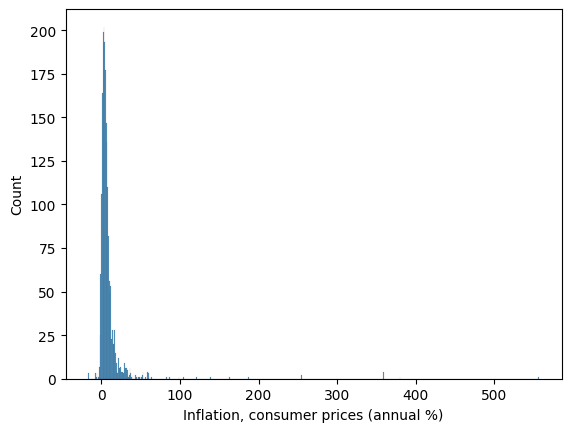

In [14]:
sns.histplot(df['Inflation, consumer prices (annual %)'])

This histogram illustrates the global economic backdrop against which efforts to improve HIV treatment and ARI care unfold. The towering peak near zero signifies that many regions experience relatively stable prices. This economic stability can foster consistent funding and resource allocation for healthcare initiatives.

However, the long tail extending to the right tells a different part of the story. In areas facing higher inflation, the cost of delivering healthcare services, procuring medications, and ensuring access for patients can significantly increase. This economic pressure can strain healthcare budgets, potentially hindering the progress of HIV treatment programs and ARI care initiatives. The few instances of very high inflation in the far right highlight extreme economic challenges that could severely impact healthcare access and quality in those regions.

Therefore, while this chart doesn't directly measure health outcomes, it provides a crucial context. It suggests that economic stability, characterized by low inflation, can create a more favorable environment for sustainable and effective HIV treatment and ARI care programs globally.

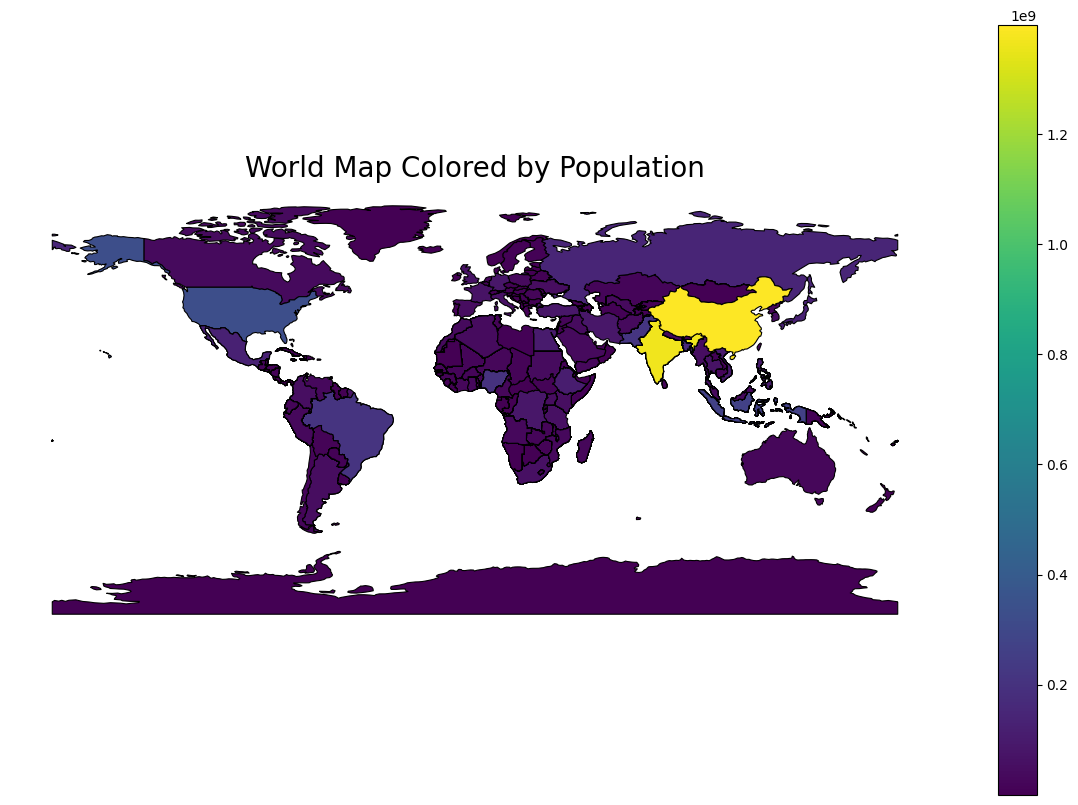

In [17]:
# import pandas as pd
# import geopandas as gpd
# import plotly.express as px

# # Step 3: Load world map
# world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# # Step 4: Merge world with population data (df is already a pandas dataframe)
# # Ensure that the 'country' column in df matches the 'NAME' column in world GeoDataFrame
# world = world.merge(df, how="left", left_on="NAME", right_on="country")

# # Step 4.5: Check column names after merging
# print(world.columns)

# # If the population column is named differently, you can either rename it or directly reference it.
# # Assuming 'Population_total' should be used, but double-check that this is the actual name:
# if 'Population_total' not in world.columns:
#     world = world.rename(columns={'POP_EST': 'Population_total'})  # or replace with actual column name

# # Step 5: Create Plotly choropleth map directly using the GeoDataFrame
# fig = px.choropleth(
#     world,
#     geojson=world.geometry.__geo_interface__,  # Use the GeoDataFrame geometry
#     locations=world.index,  # Use index for locations
#     color="Population_total",  # Use the population column to color the countries
#     hover_name="NAME",
#     color_continuous_scale="Viridis",  # Choose your preferred color scale
#     title="World Map Colored by Population"
# )

# # Adjust layout to give the globe effect
# fig.update_geos(
#     projection_type="orthographic",  # Globe-like projection
#     showcoastlines=True,
#     coastlinecolor="Black",
#     showland=True,
#     landcolor="lightgray",
#     showcountries=True,
#     countrycolor="Black"
# )

# # Show the plot
# fig.show()
# fig.write_html("world_population_map.html")




import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Load the world map
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

# Step 2: Merge world with your population dataframe (df should be already loaded)
world = world.merge(df, how="left", left_on="NAME", right_on="country")

# Step 3: Ensure the population column is correctly named
if 'Population_total' not in world.columns:
    world = world.rename(columns={'POP_EST': 'Population_total'})  # adjust if needed

# Step 4: Plot the static world map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot and color countries by Population_total
world.plot(
    column="Population_total",   # Color based on population
    cmap="viridis",               # Color map (same as you used in Plotly)
    linewidth=0.8,
    ax=ax,
    edgecolor="black",
    legend=True
)

# Step 5: Customize title and layout
ax.set_title("World Map Colored by Population", fontsize=20)
ax.set_axis_off()  # Turn off the axis for a cleaner look

# Save the static plot
plt.savefig("world_population_static_map.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


- India and China are the two most populous countries in the world, with populations of over 1.4 billion each.
- Minority of the population lies in other countries excluding India and China.

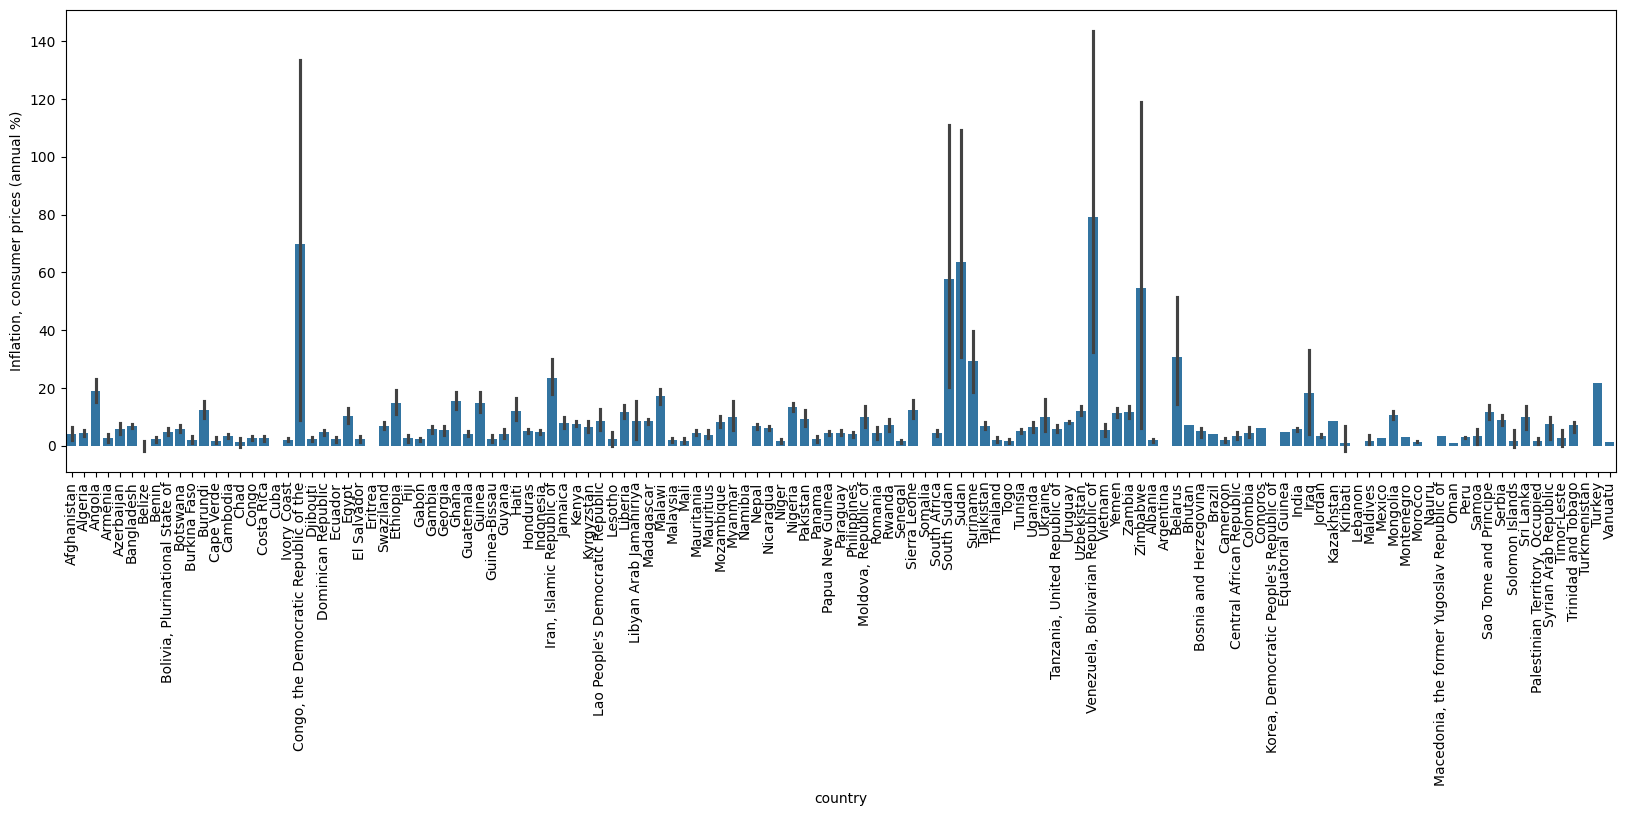

In [18]:
plt.figure(figsize=(20, 6))
sns.barplot(x='country', y='Inflation, consumer prices (annual %)', data=df)
plt.xticks(rotation=90)
plt.show()

This bar chart, depicting national inflation rates, offers a crucial economic lens through which to understand the landscape of HIV treatment and ARI care. The varying heights of the bars highlight the diverse economic pressures faced by different nations. Countries with lower inflation generally possess a more stable financial environment, potentially enabling more consistent and robust healthcare funding for HIV and ARI programs. Conversely, higher inflation can strain healthcare budgets, potentially hindering the accessibility and quality of essential treatment and care services. The economic volatility indicated by the error bars in some nations further underscores the challenges these countries might face in maintaining stable and effective healthcare systems for these critical health needs.

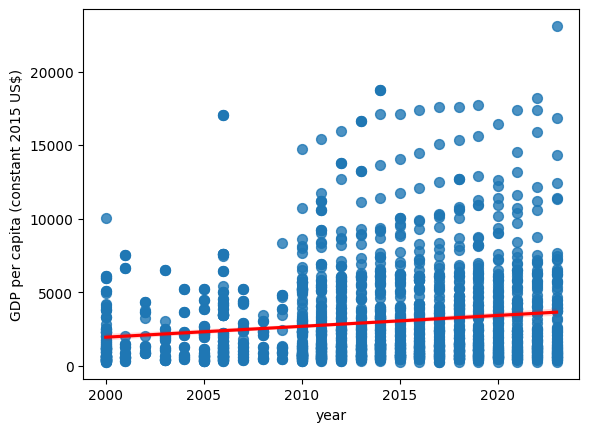

In [19]:
sns.regplot(x='year', y='GDP per capita (constant 2015 US$)', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.show()

This scatter plot examines the relationship between a nation's economic output per person, measured as GDP per capita over time, and the global landscape of HIV treatment and ARI care. The upward-sloping red line suggests a general trend of increasing global wealth, which could potentially lead to greater resources for healthcare. However, the significant spread of data points at each year highlights substantial economic disparities between countries. Nations with higher GDP per capita may possess greater capacity to invest in robust healthcare systems for HIV and ARI, while those with lower GDP per capita might face economic limitations in addressing these health needs. This visualization implies that a country's economic strength is a crucial contextual factor influencing its ability to effectively manage HIV and ARI.

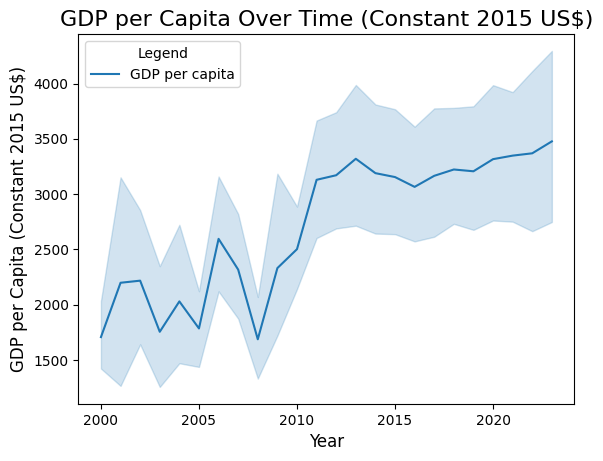

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the line plot
sns.lineplot(x='year', y='GDP per capita (constant 2015 US$)', data=df, label='GDP per capita')

# Add title, labels, and legend
plt.title('GDP per Capita Over Time (Constant 2015 US$)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per Capita (Constant 2015 US$)', fontsize=12)

# Show the legend
plt.legend(title='Legend', loc='best')

# Display the plot
plt.show()


This line chart illustrates the trend of average GDP per capita over time, providing a view of the global economic trajectory that can influence HIV treatment and ARI care. The solid blue line depicts the average GDP per capita across the included entities (likely countries or regions) from 2000 to 2023. The shaded area around the line likely represents a measure of dispersion or variability, indicating the range of GDP per capita values around the average. The general upward trend suggests an overall increase in average economic prosperity during this period, which could potentially lead to greater resources being available for healthcare initiatives, including those focused on HIV and ARI. However, the fluctuations within the trend highlight periods of economic growth and potential downturns, which could correspondingly impact healthcare funding and access. This visualization offers a macro-economic context, suggesting that the overall economic health and its stability can play a significant role in shaping the resources and priorities dedicated to addressing global health challenges like HIV and acute respiratory infections.

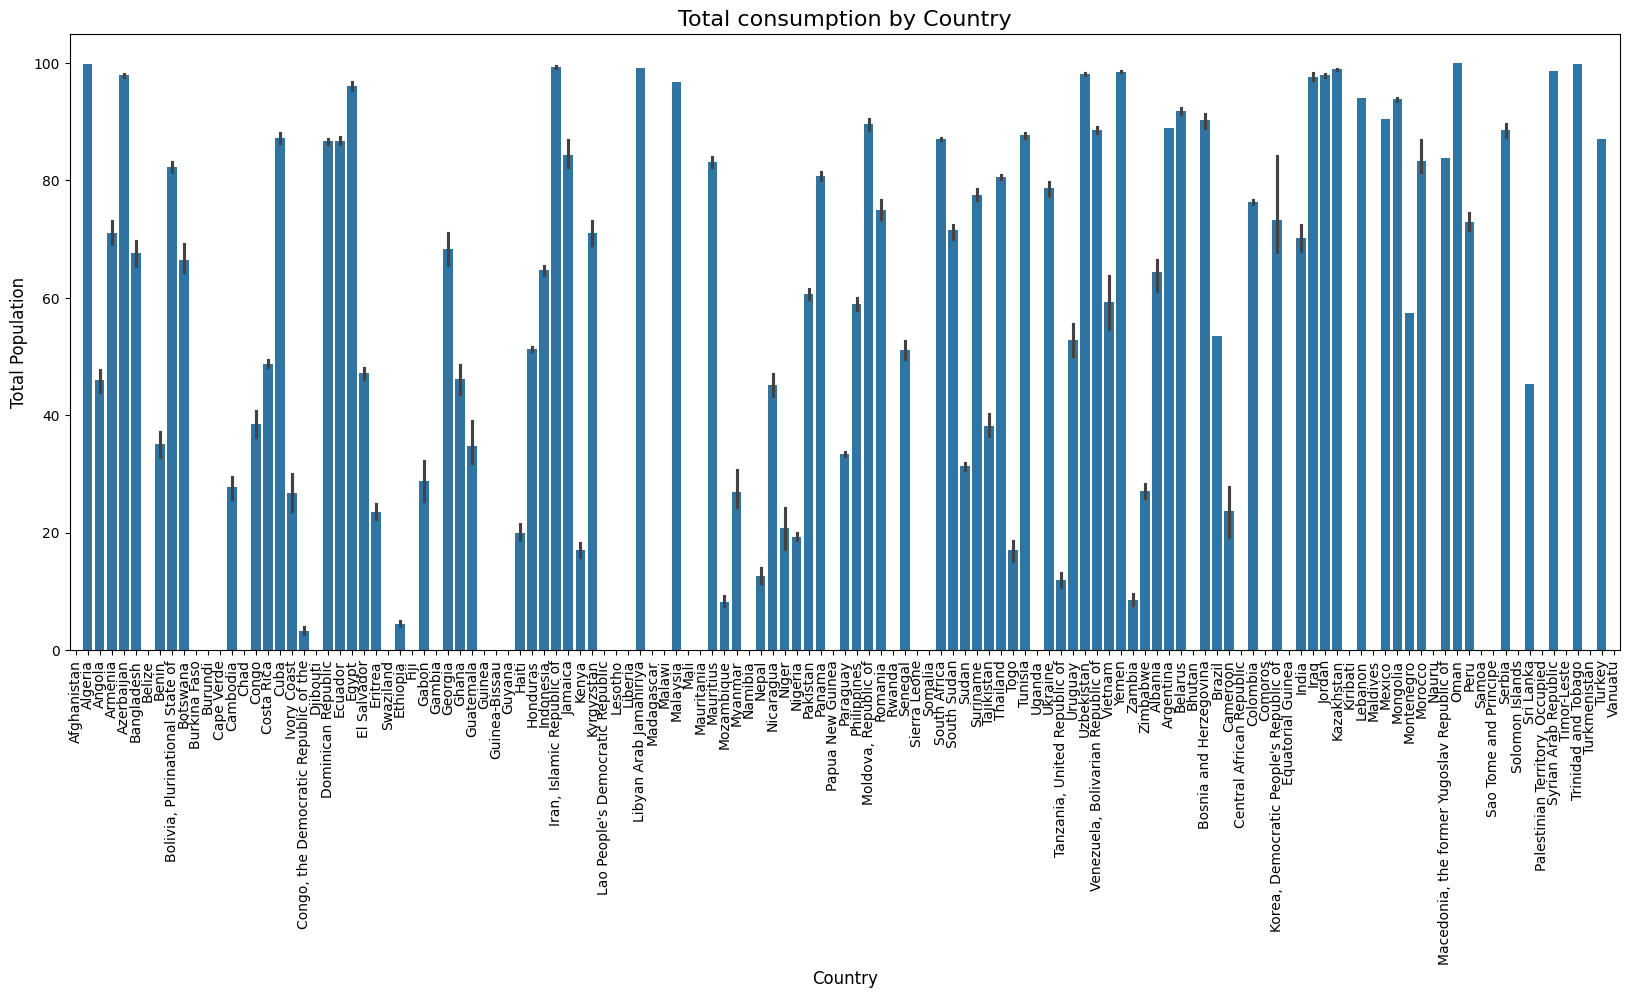

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(20, 8))  # Adjust the size as needed
sns.barplot(x='country', y='Fossil fuel energy consumption (% of total)', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Total consumption by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Population', fontsize=12)

# Display the plot
plt.show()


This bar chart presents a snapshot of total consumption by country. While seemingly an economic indicator, it can indirectly relate to HIV treatment and ARI care by reflecting a nation's overall economic activity and the capacity of its population to consume goods and services. Countries with higher total consumption (taller bars) generally indicate larger economies and potentially greater overall resources. This economic strength could translate to a greater capacity to invest in public health infrastructure, including systems for HIV treatment, prevention, and ARI care. Conversely, countries with lower total consumption (shorter bars) might face economic constraints that could limit their ability to adequately fund and support these essential healthcare services for their populations. Therefore, this visualization provides a broad measure of economic activity that can serve as a contextual factor when analyzing the resources and priorities a nation can allocate to addressing critical health challenges.

## Conclusion 

This dashboard reveals global disparities in HIV treatment and ARI care. The coverage map highlights uneven access, while hospital data shows stark country-level differences. Trends over time indicate steady HIV treatment progress but inconsistent ARI care. Gender analysis exposes gaps, often favoring females. Lastly, the correlation analysis suggests that improving one form of care can boost the other, emphasizing the need for balanced healthcare efforts.